# Tennis Ace Project

## Overview

This project contains a series of open-ended requirements which describe the project you’ll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem.

## Project Goals

You will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, you will determine what it takes to be one of the best tennis players in the world.


“Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today you will put your linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

Open the hint for more information about each column of the dataset.

## Identifying Data

* Player: name of the tennis player
* Year: year data was recorded

## Service Game Columns (Offensive)

* Aces: number of serves by the player where the receiver does not touch the ball
* DoubleFaults: number of times player missed both first and second serve attempts
* FirstServe: % of first-serve attempts made
* FirstServePointsWon: % of first-serve attempt points won by the player
* SecondServePointsWon: % of second-serve attempt points won by the player
* BreakPointsFaced: number of times where the receiver could have won service game of the player
* BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
* ServiceGamesPlayed: total number of games where the player served
* ServiceGamesWon: total number of games where the player served and won
* TotalServicePointsWon: % of points in games where the player served that they won

## Return Game Columns (Defesinve)

* FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
* SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
* BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
* BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
* ReturnGamesPlayed: total number of games where the player’s opponent served
* ReturnGamesWon: total number of games where the player’s opponent served and the player won
* ReturnPointsWon: total number of points where the player’s opponent served and the player won
* TotalPointsWon: % of points won by the player

## Outcomes

* Wins: number of matches won in a year
* Losses: number of matches lost in a year
* Winnings: total winnings in USD($) in a year
* Ranking: ranking at the end of year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
tennis = pd.read_csv('tennis_stats.csv')
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [4]:
tennis.describe(include='all')

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
unique,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ivan Dodig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,NaN,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,NaN,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,NaN,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,NaN,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,NaN,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000


In [5]:
# Create a list with the offensive variables
offensive = ['Aces', 'DoubleFaults','FirstServe', 'FirstServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 
             'TotalServicePointsWon']
# Create a list with the defensive variables
defensive = ['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon',
             'ReturnPointsWon', 'TotalPointsWon']

# Create a list with outcome variables
outcome = ['Wins', 'Losses', 'Winnings', 'Ranking']

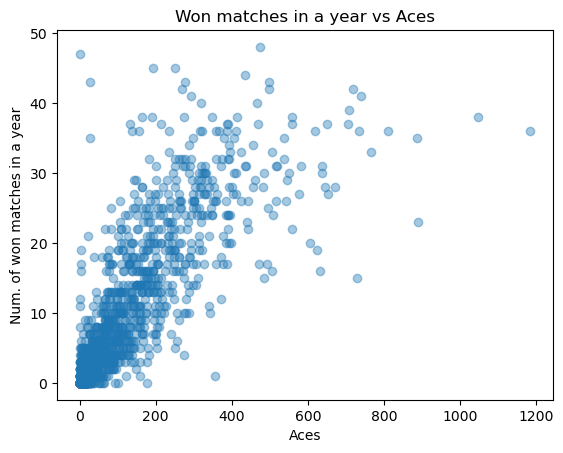

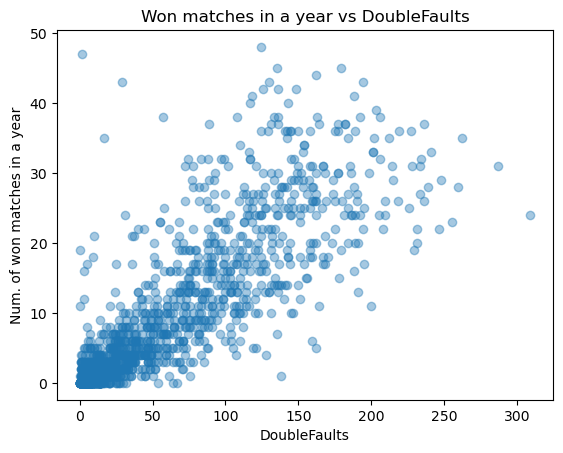

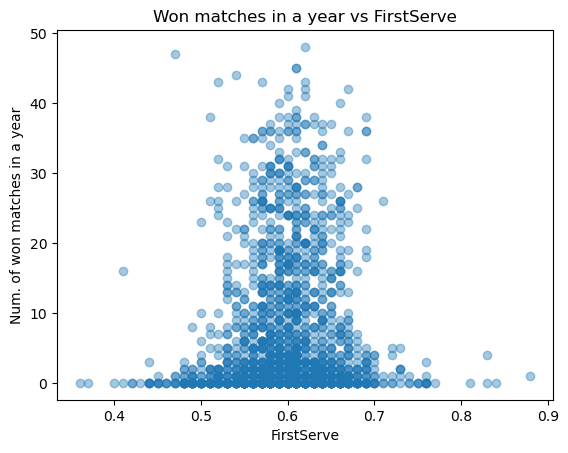

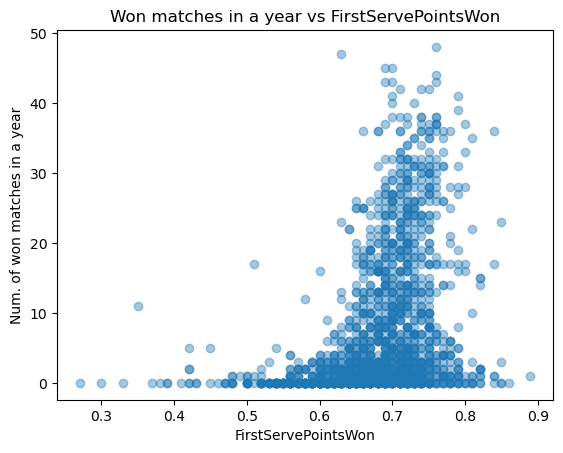

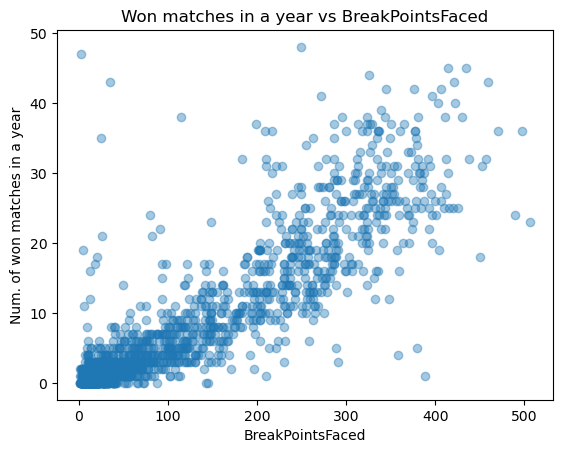

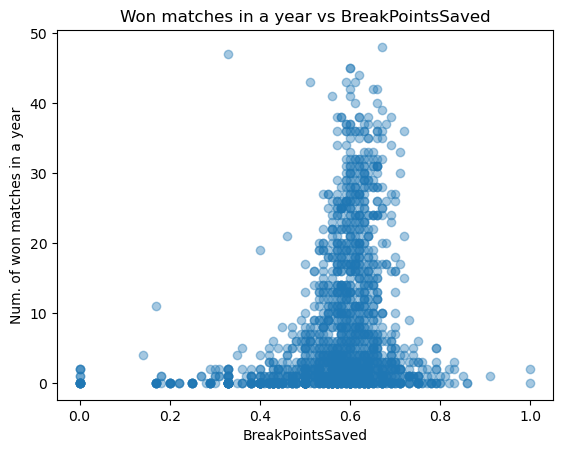

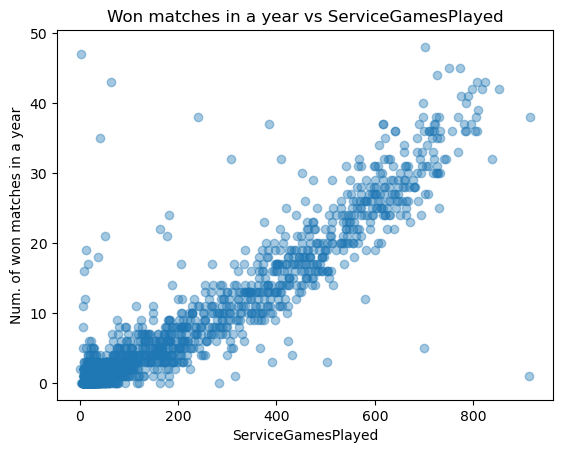

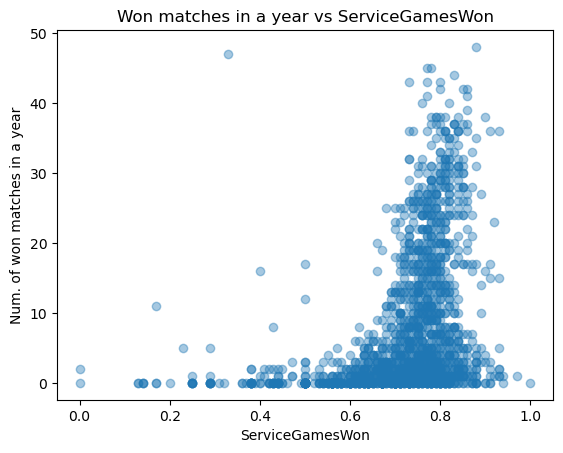

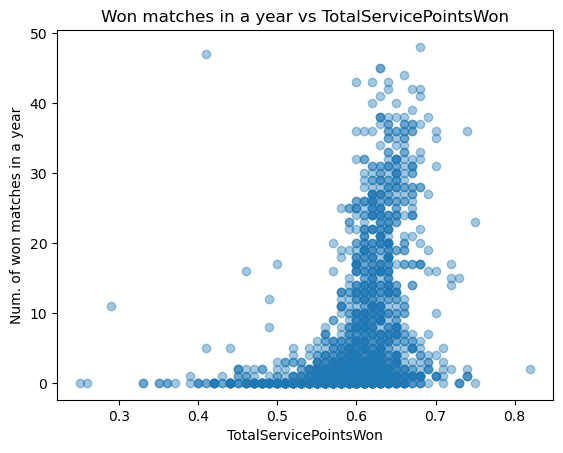

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot offensive variables against outcome variable 'Wins'
for variable in offensive:
    plt.scatter(tennis[variable],tennis['Wins'], alpha=0.4)
    plt.xlabel(variable)
    plt.ylabel('Num. of won matches in a year')
    plt.title('Won matches in a year vs ' + variable)
    plt.show()
    plt.clf()

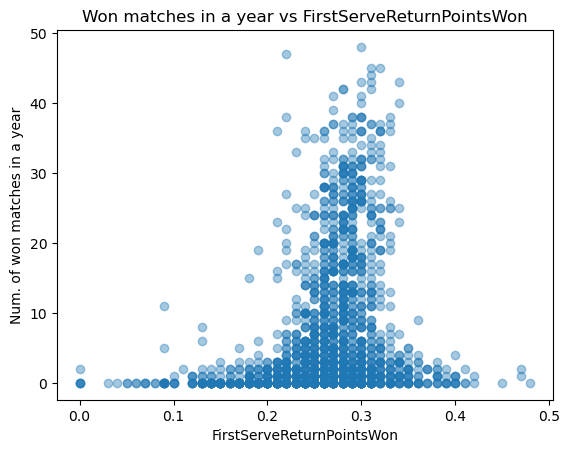

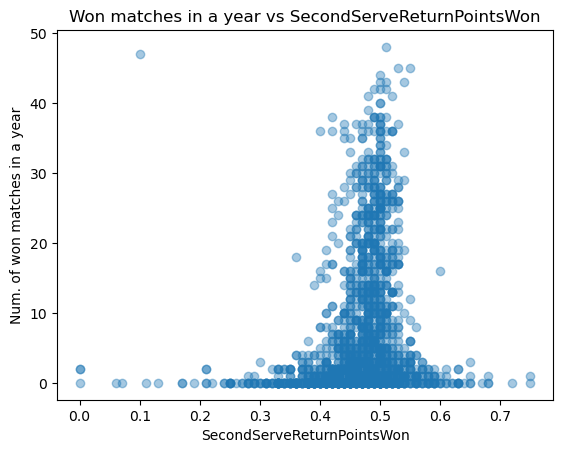

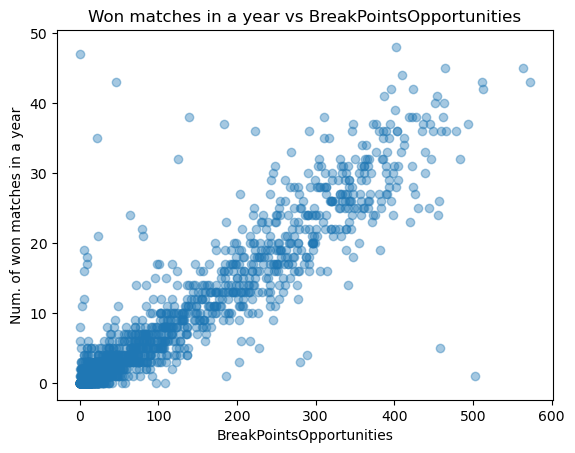

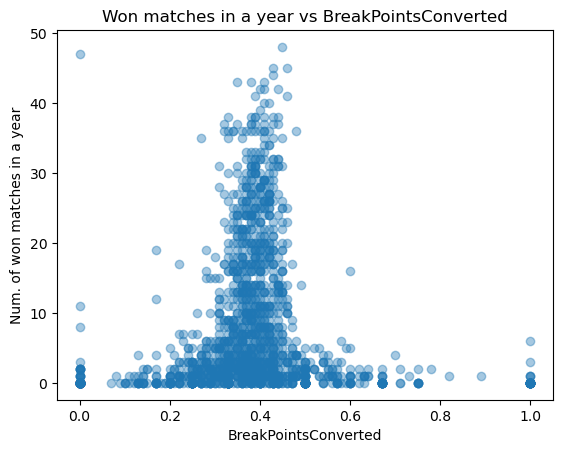

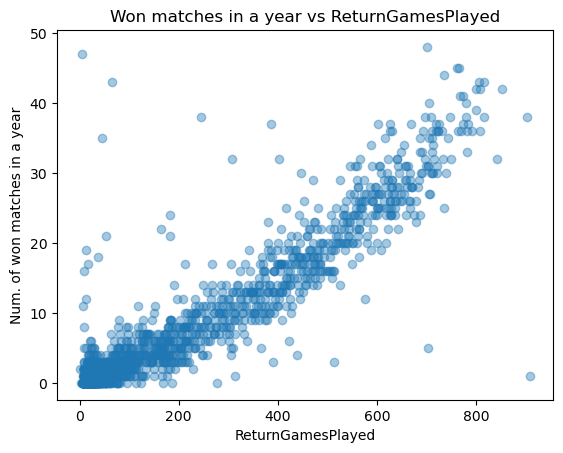

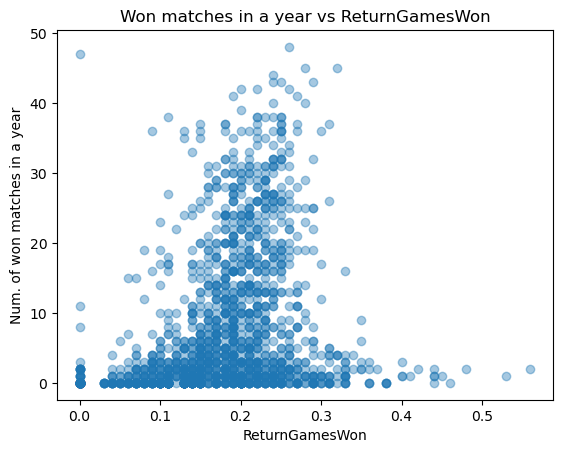

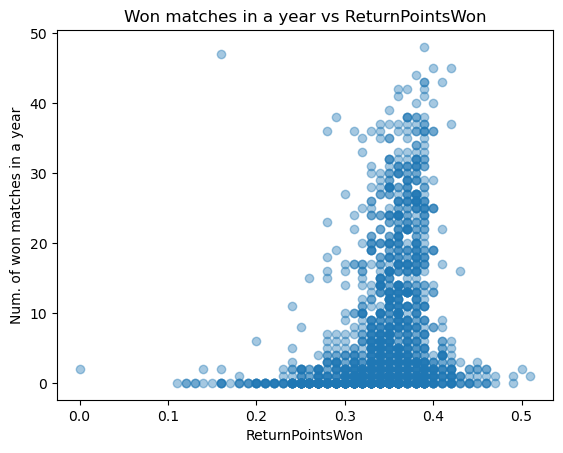

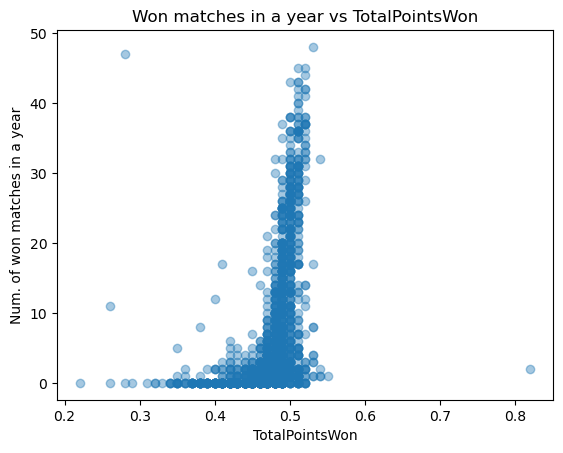

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot defensive variables against outcome variable wins
for variable in defensive:
    plt.scatter(tennis[variable],tennis['Wins'], alpha=0.4)
    plt.xlabel(variable)
    plt.ylabel('Num. of won matches in a year')
    plt.title('Won matches in a year vs ' + variable)
    plt.show()
    plt.clf()

### Offensive variables linearly related to the outcome variable win:

* Aces
* DoubleFaults
* BreakPointsFaced
* ServiceGamesPlayed

### Defensive variables linearly related to the outcome variable win:

* BreakPointsOpportuinities
* ReturnGamesPlayed



## Linear Regression Models using one predictor

Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

In [16]:
# Build a linear regression model to predict 'Wins' using the variable 'ServiceGamesPlayed'
# Set x and y variables
x = tennis[['ServiceGamesPlayed']]
y = tennis['Wins']

# Train-test-split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


In [17]:
# Fit the linear Regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.85
Test score: 0.90


Text(0.5, 1.0, 'Model Predictions on Test Set')

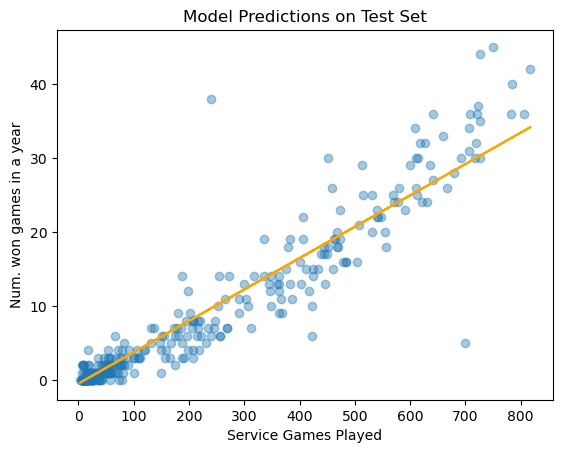

In [21]:
# Predict outcome variable 'Wins' on the test set
y_pred = reg.predict(x_test)

plt.scatter(x_test, y_test, alpha=0.4)
plt.plot(x_test, y_pred, color='orange')
plt.xlabel('Service Games Played')
plt.ylabel('Num. won games in a year')
plt.title('Model Predictions on Test Set')


In [23]:
# Build a linear regression model to predict 'Wins' using the variable 'Aces'
# Set x and y variables
x = tennis[['Aces']]
y = tennis['Wins']

# Train-test-split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


In [25]:
# Fit the linear Regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.69
Test score: 0.62


Text(0.5, 1.0, 'Model Predictions on Test Set')

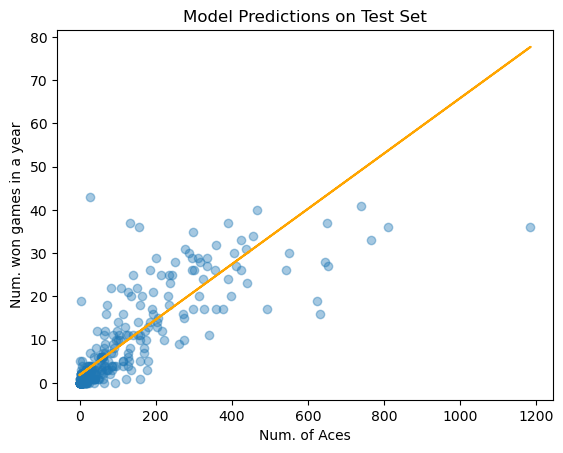

In [27]:
# Predict outcome variable 'Wins' on the test set
y_pred = reg.predict(x_test)

plt.scatter(x_test, y_test, alpha=0.4)
plt.plot(x_test, y_pred, color='orange')
plt.xlabel('Num. of Aces')
plt.ylabel('Num. won games in a year')
plt.title('Model Predictions on Test Set')

In [29]:
# Build a linear regression model to predict 'Wins' using the variable 'BreakPointsOpportunities'
# Set x and y variables
x = tennis[['BreakPointsOpportunities']]
y = tennis['Wins']

# Train-test-split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


In [31]:
# Fit the linear Regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.86
Test score: 0.83


Text(0.5, 1.0, 'Model Predictions on Test Set')

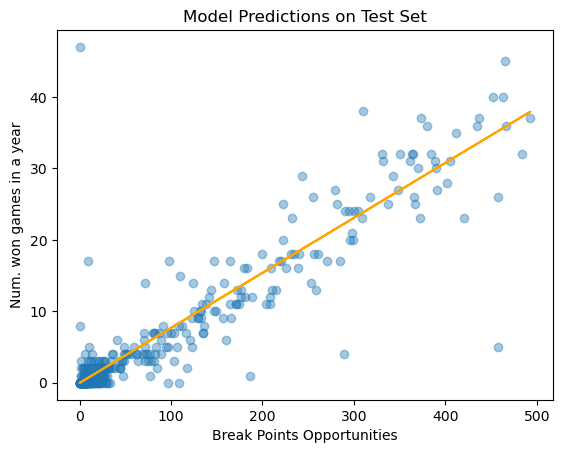

In [33]:
# Predict outcome variable 'Wins' on the test set
y_pred = reg.predict(x_test)

plt.scatter(x_test, y_test, alpha=0.4)
plt.plot(x_test, y_pred, color='orange')
plt.xlabel('Break Points Opportunities')
plt.ylabel('Num. won games in a year')
plt.title('Model Predictions on Test Set')

Three linear regression models have been created to predict the outcome variable `Wins` using either `ServiceGamesPlayed`, `Aces`, or `BreakPointsOpportunities` as predictor. The best score on the test dataset was obteined for the model using `ServiceGamesPlayed` as predictor, closely followed by the model using `BreakPointsOpportunities`. Therefore, these two variables seem to explain much of the variability of the outcome variable. Instead, the model using `Aces` as predictor produced a test score of 0.67, which indicates that this predictor variable is not as good explaining the variability within the outcome variable as the other predictors explored. 

## Linear Regression Models Using Two Predictors

In [37]:
# Build linear regression model to predict 'Wins' using variables 'DoubleFaults' and 'ServiceGamesPlayed' as predictors
# Define x and y variables
x = tennis[['DoubleFaults','ServiceGamesPlayed']]
y = tennis['Wins']

# Train-test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [39]:
# Fit linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.86
Test score: 0.87


In [41]:
# Build linear regression model to predict 'Wins' using variables 'BreakPointsOpportunities' and 'ServiceGamesPlayed' as predictors
# Define x and y variables
x = tennis[['BreakPointsOpportunities','ServiceGamesPlayed']]
y = tennis['Wins']

# Train-test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [43]:
# Fit linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.87
Test score: 0.88


In [45]:
# Build linear regression model to predict 'Wins' using variables 'ReturnGamesWon' and 'ServiceGamesPlayed' as predictors
# Define x and y variables
x = tennis[['ReturnGamesWon','ServiceGamesPlayed']]
y = tennis['Wins']

# Train-test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [47]:
# Fit linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.86
Test score: 0.90


In [49]:
# Build linear regression model to predict 'Wins' using variables 'ReturnGamesWon' and 'BreakPointsOpportunities' as predictors
# Define x and y variables
x = tennis[['ReturnGamesWon','BreakPointsOpportunities']]
y = tennis['Wins']

# Train-test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [51]:
# Fit linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.85
Test score: 0.88


Four models were created using two features to predict the outcome variable `Wins` and obtained the following R2 scores:
* `DoubleFaults` and `ServiceGamesPlayed`: 0.87
* `BreakPointsOpportunities` and `ServiceGamesPlayed`: 0.88
* `ReturnGamesWon` and `ServiceGamesPlayed`: 0.90
* `ReturnGamesWon` and `BreakPointsOpportunities`: 0.88


Therefore, the best prediction is achieved when using the features `ReturnGamesWon` and `ServiceGamesPlayed` as they are able to explain 90% of the variation of the response variable `Wins`. 

## Multiple Linear Regression

In [57]:
# Build linear regression model to predict 'Wins' using variables 'ServiceGamesPlayed','ReturnGamesPlayed', and 'BreakPointsOpportunities' as predictors
# Define x and y variables
x = tennis[['ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsOpportunities']]
y = tennis['Wins']

# Train-test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [59]:
# Fit linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.86
Test score: 0.89


In [61]:
# Build linear regression model to predict 'Wins' using variables 'Aces','DoubleFaults', and 'BreakPointsFaced' as predictors
# Define x and y variables
x = tennis[['Aces','DoubleFaults','BreakPointsFaced']]
y = tennis['Wins']

# Train-test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [63]:
# Fit linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.85
Test score: 0.78


In [65]:
# Build linear regression model to predict 'Wins' using variables 'ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsOpportunities','Aces','DoubleFaults', and 'BreakPointsFaced' as predictors
# Define x and y variables
x = tennis[['ServiceGamesPlayed','ReturnGamesPlayed','BreakPointsOpportunities','Aces','DoubleFaults','BreakPointsFaced']]
y = tennis['Wins']

# Train-test split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [67]:
# Fit linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)
score_train = reg.score(x_train, y_train)
score_test = reg.score(x_test, y_test)
print(f'Train score: {score_train:.2f}')
print(f'Test score: {score_test:.2f}')

Train score: 0.89
Test score: 0.87


Three multiple linear regression models have been created to predict the outcome variable `Wins`. The models obtained the following R2 scores:
* `ServiceGamesPlayed`, `ReturnGamesPlayed`, `BreakPointsOpportunities`: 0.89
* `Aces`, `DoubleFaults`, `BreakPointsFaced`: 0.78
* `ServiceGamesPlayed`, `ReturnGamesPlayed`, `BreakPointsOpportunities`, `Aces`, `DoubleFaults`, `BreakPointsFaced`: 0.87

According to the R2 scores, the best multiple linear regression model is the one including the predictor variables `ServiceGamesPlayed`, `ReturnGamesPlayed`, `BreakPointsOpportunities`. Adding to the model the remaining variables that seemed linearly related with the outcome variable `Wins` did not improve the score of the model. 

It should be noted that the model including the two features `ServiceGamesPlayed` and `ReturnGamesPlayed` produced a better score than the multiple linear regression including also `BreakPointsOpportunities`. This indicates that most of the variation in the `Wins` outcome variable is already explained by the features `ServiceGamesPlayed` and `ReturnGamesPlayed`. The addition of further features to the model does not seem to add aditional information. 